# **Importar librerias**

In [1]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Importar métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Cargar dataset
df = pd.read_csv('Salary Data.csv')

# Visualizar los primeros 5 registros
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [8]:
# Verificar si hay valores nulos
print(df.isnull().sum())

# Análisis descriptivo de las variables
print(df.describe())

YearsExperience    0
Salary             0
dtype: int64
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [9]:
# Verificar si hay valores NaN
print(df.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


In [13]:
# Configurar tamaño de la figura
plt.figure(figsize=(6, 4))

# Configurar estilo de la gráfica en ggplot
plt.style.use('ggplot')

# Poner letra Palatino Linotype
plt.rcParams['font.family'] = 'Dejavu Serif'

<Figure size 600x400 with 0 Axes>

/tmp/ipykernel_22178/1348399166.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['YearsExperience'], kde=True, bins=10, edgecolor='black', linewidth=2.5, palette='viridis')


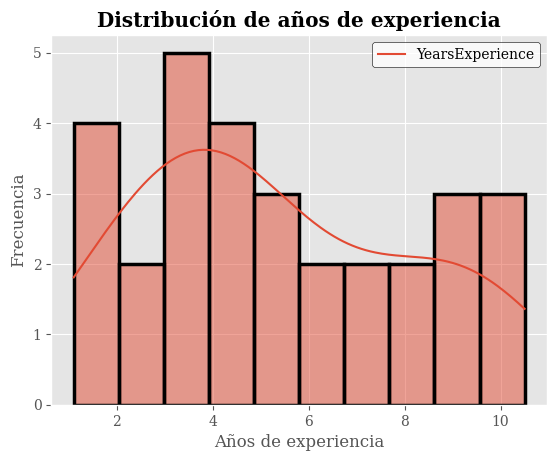

In [16]:
# Histograma de la variable YearsExperience
sns.histplot(df['YearsExperience'], kde=True, bins=10, edgecolor='black', linewidth=2.5, palette='viridis')
plt.title('Distribución de años de experiencia', fontweight='bold')
plt.xlabel('Años de experiencia')
plt.ylabel('Frecuencia')
# Leyenda con fondo contrastante con el color de la gráfica
plt.legend(['YearsExperience'], loc='upper right', frameon=True, facecolor='white', edgecolor='black')
plt.show()

/tmp/ipykernel_22178/2691599876.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Salary'], kde=True, bins=10, edgecolor='black', linewidth=2.5, palette='viridis')


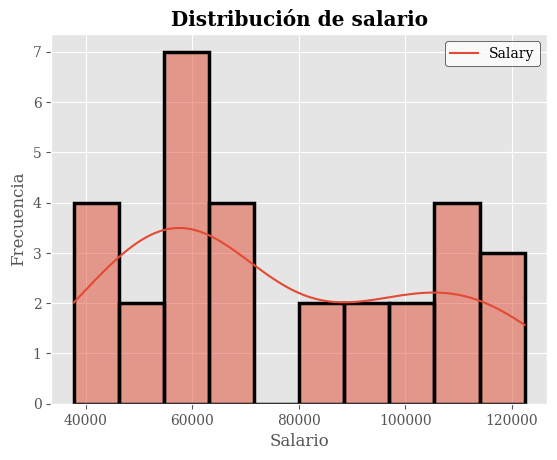

In [17]:
# Visualizar histograma de la variable Salary
sns.histplot(df['Salary'], kde=True, bins=10, edgecolor='black', linewidth=2.5, palette='viridis')
plt.title('Distribución de salario', fontweight='bold')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.legend(['Salary'], loc='upper right', frameon=True, facecolor='white', edgecolor='black')
plt.show()

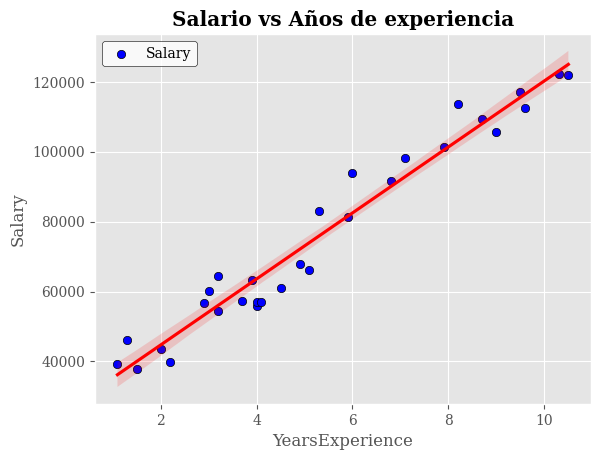

In [19]:
# Gráfica de dispersión de las variables
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue', edgecolor='black', linewidth=0.5)
plt.title('Salario vs Años de experiencia', fontweight='bold')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
# Leyenda con fondo contrastante con el color de la gráfica
plt.legend(['Salary'], loc='upper left', frameon=True, facecolor='white', edgecolor='black')
# Linea de regresión
sns.regplot(x='YearsExperience', y='Salary', data=df, color='red', scatter=False)
plt.show()

# **Entrenamiento del modelo de regresión lineal**

In [45]:
# Seleccionar las variables independientes (YearsExperience) y dependiente (Salary)
X = df['YearsExperience']
y = df['Salary']

# Divir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Error absoluto medio
mae = np.mean(np.abs(y_test - y_pred))
# RanGo de valores de la variable dependiente
range_y = y_test.max() - y_test.min()

# Mostrar las métricas
print('Error cuadrático medio:', mse)
print('Error absoluto medio:', mae)
print('Rango de valores de la variable dependiente:', range_y)
print('Coeficiente de determinación:', r2)

Error cuadrático medio: 12823412.298126526
Error absoluto medio: 2446.172369046504
Rango de valores de la variable dependiente: 84660.0
Coeficiente de determinación: 0.988169515729126


# **Conlusiones**

El error cuadrático medio es un indicador de la calidad del modelo, donde un valor más bajo indica un mejor rendimiento del modelo. En este caso, el error cuadrático medio es de 12823412.298126526, lo que significa que el modelo tiene un error promedio de 12823412.298126526 en la predicción del salario.

El coeficiente de determinación es un indicador de la calidad del modelo, donde un valor más alto indica un mejor rendimiento del modelo. En este caso, el coeficiente de determinación es de 0.988169515729126, lo que significa que el modelo es capaz de explicar el 98.82% de la variabilidad de la variable dependiente (salario) a partir de la variable independiente (años de experiencia).


In [21]:
# Imprimir rango de valores posibles de la variable dependiente
print('Rango de valores posibles de la variable dependiente:', df['Salary'].min(), df['Salary'].max())

Rango de valores posibles de la variable dependiente: 37731.0 122391.0


El rango de valores posibles de la variable dependiente es de $37731.0$ a $122391.0$. Un error cuadrático medio de $12823412.298126526$ significa que el modelo tiene un error promedio de $12823412.298126526$ en la predicción del salario, lo que es significativamente mayor que el rango de valores posibles de la variable dependiente. Por lo tanto, el error cuadrático medio es alto en comparación con el rango de valores posibles de la variable dependiente.

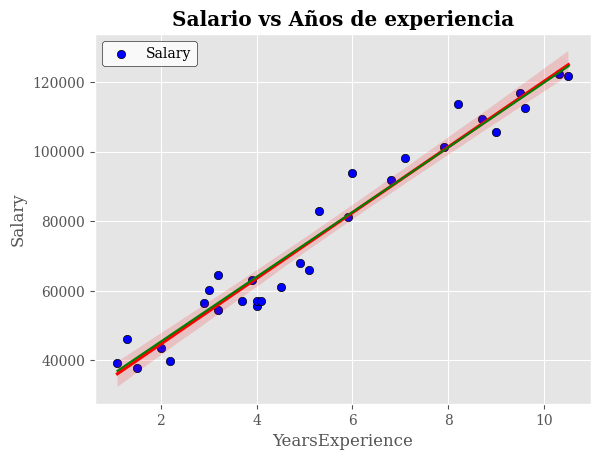

In [23]:
# Crear un rango de valores de la variable independiente
X_range = np.linspace(df['YearsExperience'].min(), df['YearsExperience'].max(), 100).reshape(-1, 1)

# Predecir los valores del rango de valores de la variable independiente
y_range = model.predict(scaler.transform(X_range))

# Gráfica de dispersión de las variables
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue', edgecolor='black', linewidth=0.5)
plt.title('Salario vs Años de experiencia', fontweight='bold')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
# Leyenda con fondo contrastante con el color de la gráfica
plt.legend(['Salary'], loc='upper left', frameon=True, facecolor='white', edgecolor='black')
# Linea de regresión
sns.regplot(x='YearsExperience', y='Salary', data=df, color='red', scatter=False)
# Linea de regresión con el rango de valores
plt.plot(X_range, y_range, color='green')
plt.show()

In [25]:
# Comparar el error cuadrático medio con el rango de valores posibles de la variable dependiente
print('Error cuadrático medio:', mse)
print('Rango de valores posibles de la variable dependiente:', df['Salary'].min(), df['Salary'].max())

Error cuadrático medio: 12823412.298126526
Rango de valores posibles de la variable dependiente: 37731.0 122391.0


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Asume que 'df' es el DataFrame que contiene los datos
# Seleccionar las variables independientes (YearsExperience) y dependiente (Salary)
X = df[['YearsExperience']]  # Debe ser un DataFrame (2D)
y = df['Salary']  # La variable dependiente puede quedarse como serie (1D)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler

# Probar con MinMaxScaler en lugar de StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print('Error cuadrático medio:', mse)
print('Coeficiente de determinación (R²):', r2)

Error cuadrático medio: 12823412.29812657
Coeficiente de determinación (R²): 0.988169515729126


In [38]:
# Ver los coeficientes y el intercepto del modelo
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)

Coeficiente: [87538.20619125]
Intercepto: 37023.93179003029


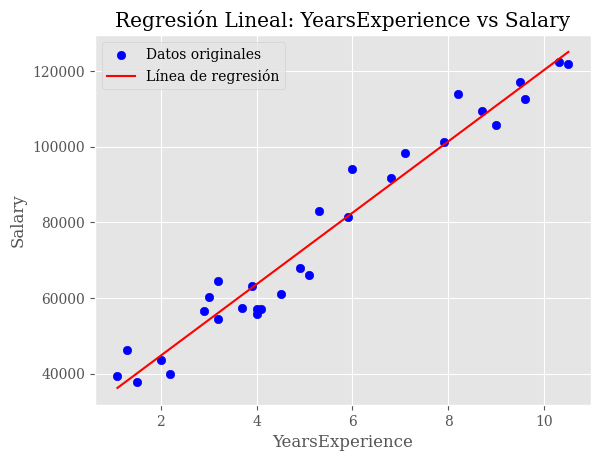

In [41]:
# Visualización con una gráfica más detallada
plt.scatter(X, y, color='blue', label='Datos originales')
plt.plot(X, model.predict(X.values.reshape(-1, 1)), color='red', label='Línea de regresión')
plt.title('Regresión Lineal: YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, model.predict(X.values.reshape(-1, 1)))
print('Error Absoluto Medio (MAE):', mae)
print('Rango de valores posibles de la variable dependiente:', df['Salary'].min(), df['Salary'].max())

Error Absoluto Medio (MAE): 4644.2012894435375
Rango de valores posibles de la variable dependiente: 37731.0 122391.0


# **Predección**

In [54]:
# Ocultar los warnings de la salida
import warnings
warnings.filterwarnings('ignore')

# Crear un input para predecir el salario a partir de los años de experiencia
years = 5
input_data = pd.DataFrame({'YearsExperience': [years]})
input_data = scaler.transform(input_data)

# Predecir el salario
salary = model.predict(input_data)

# Mostrar el salario predicho en formato de moneda USD
print(f'Salario predicho para {years} años de experiencia: ${salary[0]:,.2f}')

Salario predicho para 5 años de experiencia: $73,342.97


In [56]:
# Filtrar los datos para obtener el salario de un empleado con 5 años de experiencia en df
salary_5_years = df[df['YearsExperience'] == 5.1]['Salary'].values[0]

# Mostrar el salario real de un empleado con 5 años de experiencia en formato de moneda USD
print(f'Salario real para 5.1 años de experiencia: ${salary_5_years:,.2f}')

Salario real para 5.1 años de experiencia: $66,029.00
